Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
login = pd.read_json("logins.json")

In [ ]:
login.head()

# Part 1 ‐ Exploratory data analysis

Aggregate these login counts based on 15 minute time intervals.

In [ ]:
login2 = login.copy(deep=True)

In [ ]:
login2['login_time'] = pd.to_datetime(login['login_time'])

In [ ]:
data = login2.set_index(login2['login_time'])

In [ ]:
data2 = data.copy(deep=True)

In [ ]:
data2['Year'] = data2.index.year
data2['Month'] = data2.index.month
data2['Day'] = data2.index.day
data2['Hour'] = data2.index.hour
data2['Minute'] = data2.index.minute
data2['Second'] = data2.index.second

In [ ]:
data2

In [ ]:
data3 = data.copy(deep=True)

In [ ]:
data3['counts'] = data3['login_time'].map(data3['login_time'].value_counts())

In [ ]:
new_df = data3.copy(deep=True)

In [ ]:
new_df = new_df.resample('15min', label='right').sum(numeric_only = True)

In [ ]:
new_df

In [ ]:
new_df['Year'] = new_df.index.year
new_df['Month'] = new_df.index.month
new_df['Day'] = new_df.index.day
new_df['Hour'] = new_df.index.hour
new_df['Minute'] = new_df.index.minute

In [ ]:
new_df['Time'] = new_df.index.time

In [ ]:
def f(row):
    if 0 < row['Minute'] <= 15:
        val = ': 0-15'
    elif 15 < row['Minute'] <= 30:
        val = ': 16-30'
    elif 30 < row['Minute'] <= 45:
        val = ': 31-45'
    else:
        val = ': 46-59'
    return val

new_df['Minute_interval'] = new_df.apply(f, axis=1)

In [ ]:
new_df.drop(['Minute'], axis=1)

In [ ]:
jan_1 = new_df.loc[(new_df['Month'] == 1) & (new_df['Day']==1)]
jan_2 = new_df.loc[(new_df['Month'] == 1) & (new_df['Day']==2)]
jan_3 = new_df.loc[(new_df['Month'] == 1) & (new_df['Day']==3)]
jan_4 = new_df.loc[(new_df['Month'] == 1) & (new_df['Day']==4)]
jan_5 = new_df.loc[(new_df['Month'] == 1) & (new_df['Day']==5)]
jan_6 = new_df.loc[(new_df['Month'] == 1) & (new_df['Day']==6)]

In [ ]:
jan_1

Visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand.

In [ ]:
new_df.describe()

In [ ]:
login.describe()

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

plt.plot(new_df.index, new_df['counts'])
plt.xlabel('Date') 
plt.ylabel('Number of logins')
plt.title("Logins, January-April 1970")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=new_df, x=new_df.index, y=new_df.counts, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [ ]:
my_plot = sns.barplot(data=new_df, x=new_df.index, y=new_df.counts)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.plot(jan_1['counts'], x=jan_1.index, y=jan_1.counts)
ax1.plot(jan_2['counts'])
ax1.plot(jan_3['counts'])
ax1.plot(jan_4['counts'])
ax1.plot(jan_5['counts'])

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3)
sns.barplot(x='Time', y='counts', data=jan_1, ax=axs[0, 0]).set_title('January 1st')
sns.barplot(x='Time', y='counts', data=jan_2, ax=axs[0, 1]).set_title('January 2nd')
sns.barplot(x='Time', y='counts', data=jan_3, ax=axs[0, 2]).set_title('January 3rd')
sns.barplot(x='Time', y='counts', data=jan_4, ax=axs[1, 0]).set_title('January 4th')
sns.barplot(x='Time', y='counts', data=jan_5, ax=axs[1, 1]).set_title('January 5th')
sns.barplot(x='Time', y='counts', data=jan_6, ax=axs[1, 2]).set_title('January 6th')

plt.show()

While there is a great deal of variation, there appear to be 3 primary peaks in the number of logins over the course of each of these days.  Examining additional days throughout the year can help us discover whether this general pattern seems to exist throughout the year.

In [ ]:
feb_1 = new_df.loc[(new_df['Month'] == 2) & (new_df['Day']==1)]
feb_17 = new_df.loc[(new_df['Month'] == 2) & (new_df['Day']==17)]
mar_6 = new_df.loc[(new_df['Month'] == 3) & (new_df['Day']==6)]
mar_22 = new_df.loc[(new_df['Month'] == 3) & (new_df['Day']==22)]
apr_4 = new_df.loc[(new_df['Month'] == 4) & (new_df['Day']==4)]
apr_12 = new_df.loc[(new_df['Month'] == 4) & (new_df['Day']==12)]

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3)
sns.barplot(x='Time', y='counts', data=feb_1, ax=axs[0, 0]).set_title('February 1st')
sns.barplot(x='Time', y='counts', data=feb_17, ax=axs[0, 1]).set_title('February 17th')
sns.barplot(x='Time', y='counts', data=mar_6, ax=axs[0, 2]).set_title('March 6th')
sns.barplot(x='Time', y='counts', data=mar_22, ax=axs[1, 0]).set_title('March 22nd')
sns.barplot(x='Time', y='counts', data=apr_4, ax=axs[1, 1]).set_title('April 4th')
sns.barplot(x='Time', y='counts', data=apr_12, ax=axs[1, 2]).set_title('April 12th')

plt.show()

In [ ]:
from scipy.signal import find_peaks
peaks = find_peaks(x = new_df['counts'])

In [ ]:
peaks

In [ ]:
peaks = find_peaks(new_df['counts'])
height = peaks[1]['peak_heights'] #list of heights of peaks
peak_pos = numbers[peaks[0]]
print(peaks)

#plot the peaks
fig = plt.figure()
ax = fig.subplots()
ax.plot(numbers)
ax.scatter(peak_pos, height,color = 'r', s = 25, label = 'Maxima')

For the most part, this pattern seems to continue.  While some dates display this more strongly, none suggest strong alternative patterns.  Perhaps of interest, some dates show one peak much higher than the other peaks.  January 3rd and 4th, February 1st, March 22nd, and April 4th and 12th have higher first peaks.  January 1st and 6th, February 17th and March 6th all have higher 3rd peaks.  January 2nd and 5th and February 17th have fairly high mid-peaks, though not higher than others.

In [ ]:
new_df['Weekday'] = new_df.index.day_of_week

Please report/illustrate important features of the demand, such as daily cycles.

In [ ]:
new_df['Weekday'].loc[(new_df['Month'] == 1) & (new_df['Day']==3) | (new_df['Month'] == 1) & (new_df['Day']==4) | (new_df['Month'] == 2) & (new_df['Day']==1) | (new_df['Month'] == 3) & (new_df['Day']==22) | (new_df['Month'] == 4) & (new_df['Day']==4) | (new_df['Month'] == 4) & (new_df['Day']==12)]

In [ ]:
first_peak['Weekday'].describe()

In [ ]:
first_peak['Weekday'].unique()

In [ ]:
first_peak['Weekday'].value_counts()

Each of these dates that have the high first peak are either Saturday (5) or Sunday (6).

In [ ]:
second_peak = new_df.loc[(new_df['Month'] == 1) & (new_df['Day'] == 2) | (new_df['Month'] == 1) & (new_df['Day'] == 5) | (new_df['Month'] == 2) & (new_df['Day'] == 17)] 

In [ ]:
second_peak['Weekday'].describe()

In [ ]:
second_peak['Weekday'].unique()

In [ ]:
second_peak['Weekday'].value_counts()

Each of these dates that have a high second peak are Monday (0), Tuesday (1), or Friday (4). 

In [ ]:
third_peak = new_df.loc[(new_df['Month'] == 1) & (new_df['Day']==1) | (new_df['Month'] == 1) & (new_df['Day']==6) |  (new_df['Month'] == 2) & (new_df['Day']==17) | (new_df['Month'] == 3) & (new_df['Day']==6)]

In [ ]:
third_peak['Weekday'].describe()

In [ ]:
third_peak['Weekday'].unique()

In [ ]:
third_peak['Weekday'].value_counts()

Each of these dates that have a high third peak are Tuesday (1), Friday (4), or Thursday (3). 

Overall, 

In [ ]:
mondays = new_df.loc[(new_df['Weekday']==0)]
tuesdays = new_df.loc[(new_df['Weekday']==1)]
wednesdays = new_df.loc[(new_df['Weekday']==2)]
thursdays = new_df.loc[(new_df['Weekday']==3)]
fridays = new_df.loc[(new_df['Weekday']==4)]
saturdays = new_df.loc[(new_df['Weekday']==5)]
sundays = new_df.loc[(new_df['Weekday']==6)]

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4)

sns.barplot(x='Time', y='counts', data=mondays, ax=axs[0, 0]).set_title('Mondays')
sns.barplot(x='Time', y='counts', data=tuesdays, ax=axs[0, 1]).set_title('Tuesdays')
sns.barplot(x='Time', y='counts', data=wednesdays, ax=axs[0, 2]).set_title('Wednesdays')
sns.barplot(x='Time', y='counts', data=thursdays, ax=axs[0, 3]).set_title('Thursdays')
sns.barplot(x='Time', y='counts', data=fridays, ax=axs[1, 0]).set_title('Fridays')
sns.barplot(x='Time', y='counts', data=saturdays, ax=axs[1, 1]).set_title('Saturdays')
sns.barplot(x='Time', y='counts', data=sundays, ax=axs[1, 2]).set_title('Sundays')

plt.show()

In [ ]:
jan = new_df.loc[(new_df['Month'] == 1)]
feb = new_df.loc[(new_df['Month'] == 2)]
mar = new_df.loc[(new_df['Month'] == 3)]
apr = new_df.loc[(new_df['Month'] == 4)]

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2)

sns.barplot(x='Time', y='counts', data=jan, ax=axs[0, 0]).set_title('January')
sns.barplot(x='Time', y='counts', data=feb, ax=axs[0, 1]).set_title('February')
sns.barplot(x='Time', y='counts', data=mar, ax=axs[1, 0]).set_title('March')
sns.barplot(x='Time', y='counts', data=apr, ax=axs[1, 1]).set_title('April')

plt.show()

Interestingly, the patterns for each month are not dissimilar from many of the days we examined, in that there seem to be 3 main peaks for most months.  The first peak appears highest in April, though the data ends before the month of April ends, the 3 peaks appear approximately equal in February, and the first and third peaks slightly higher than the middle peak for March.  January appears to only really have two peaks, and both are relatively equal in height.

In [ ]:
login.loc['1970-01-01':'1970-01-31']

In [ ]:
ax = login.loc['1970-01'].plot()
ax.set_ylabel('Daily Logins')

If there are data quality issues, please report them.

# Part 2 ‐ Experiment and metrics design

#### Problem:

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

#### 1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

I would examine the number or the proportion of drivers who drove in both cities.  I would then compare this number or proportion before toll fees were reimbursed to the number or proportion after toll fees were reimbursed.

#### 2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a) how you will implement the experiment

I would first gather information for each driver about their daily or weekly drives.  I would gather such variables as  as driver ID number, number of rides given, miles driven, whether or not they cross the toll bridge or how often they cross the bridge, perhaps which city they originate in, whether or not they complete drives in both cities in a 24 hour period, etc.  I would not need all of these variables, but for each driver, the minimum amount of information I would be one variable to tell me whether or not each drove in both cities.  This could be a numerical value, such as how many times they crossed the toll bridge or how many times they drove in each city within a specific period of time, like within 24 hours or over the course of a week.  Alternatively, this could be a binary categorical variable such as yes or no about whether each driver crossed the toll bridge or yes or no whether each driver drove in both cities within a specific period of time.

The experiment would be completed by taking information from each driver before implementing any toll reimbursement and then collecting that same information from each driver after the toll reimbursement program was in effect.  

(If it is not feasible to collect information from every driver, such as if the number of drivers is very large or if some are difficult to contact, or if the drivers are not the same over enough period of time for each to give information both before and after the change, we would instead collect information from a random sample of drivers.  However, using a sample would alter the statistical tests we would perform later as we would be performing analysis on a sample of the population we are studying rather than the whole of the population we are interested in.  I will move ahead under the assumption that the population of drivers in these neighboring cities is stable, consistent, not overly large, and relatively easy to contact/gather information from.  Therefore, we would be collecting information from the whole population of interest in our experiment.)

Additional considerations and recommendations:  I might recommend that the second round of information is collected not immediately after the program is in place but instead taken after enough time that drivers might have altered their regular routines.  This would help to prevent the numbers reflecting any initial boom of toll bridge crossing that might come from early excitement that might not be sustained over a longer period of time or of numbers instead taking time to shift in the case of any hesitancy of drivers to alter their routes, learn new habits, or deciding whether the reimbursement was helpful enough for them to continue crossing the bridge regularly.  Ideally, the "after" collection of information would be taken at a time when it might show any change that is likely to be fairly stable in the future.)  I would also encourage the cities to be sure that they notified all drivers of the change, answered any questions drivers might have, and set up the reimbursement system to be easy for drivers to use.  This would prevent

    b) what statistical test(s) you will conduct to verify the significance of the observation

A paired t-test is the statistical test that is most often used to compare one group before and after a change, if the dependent variable we are analyzing is continuous.  For example, his would be the case if we were looking at the distance each driver traveled in a day.  If we are using binary variables, for example if the dependent variable is yes/no as to whether each driver drove in both places before and/or after tolls were reimbursed, we would use a non-parametric test, such as McNemar's test.  Chi-squared test might be used if we are comparing the proportino of drivers before and after toll reimbursement.  In the way I envision the experiment, I would be to create a binary dependent variable:  yes/no whether each driver drove in both cities, or did the driver cross the toll bridge, (perhaps within a week) and to compare this variable for each driver before and after toll reimbursement.  Therefore, McNemar's test would work best.

    c) interpret the results and provide recommendations to the city operations team along with any caveats.

If the p-value is less than alpha (which we'll set at 0.5), the proportion of drivers who cross the toll bridge and drive in both cities is significantly different after the reimbursement program began than before.  If our contingency table shows that the proportion is higher after, and the test determined that this increase was statistically significant, I would conclude that the program has had the desired effect.  Therefore, I would recommend that the city operations team continue the reimbursement program.   
       
As the experiment was conducted on the full population of interest, that is the drivers in these cities, we do not need to be concerned about whether our sample was sufficiently large to be representative of the population.  Instead, assuming that the data collection and analysis was done correctly, we know that the results show how toll reimbursement affected all the current drivers.  The only caveats I might mention to the city operations team would be big-picture and city specific considerations, such as whether this result is likely to continue in the future.  The team may know enough about drivers in their city to consider questions such as whether the result could be a temporary effect from possible new program excitement that would decrease with time or whether future drivers will follow the same behaviors as the current drivers.  I do not have specific concerns about the statistical result in this case.

# Part 3 ‐ Predictive modeling

#### Problem:  
    
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

#### Data description    
● city: city this user signed up in     
● phone: primary device for this user     
● signup_date: date of account registration; in the form ‘YYYYMMDD’     
● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’     
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup     
● avg_rating_by_driver: the rider’s average rating over all of their trips     
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips     
● surge_pct: the percent of trips taken with surge multiplier > 1     
● avg_surge: The average surge multiplier over all of this user’s trips     
● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up     
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise     
● weekday_pct: the percent of the user’s trips occurring during a weekday

In [3]:
ultimate = pd.read_json("ultimate_data_challenge.json")
ultimate

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


#### 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice).

In [4]:
ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [5]:
ultimate.describe

<bound method NDFrame.describe of                  city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2 

In [6]:
ultimate.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [7]:
nan_rows = ultimate[ultimate.isnull().T.any()]

In [8]:
nan_rows

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0


<AxesSubplot: >

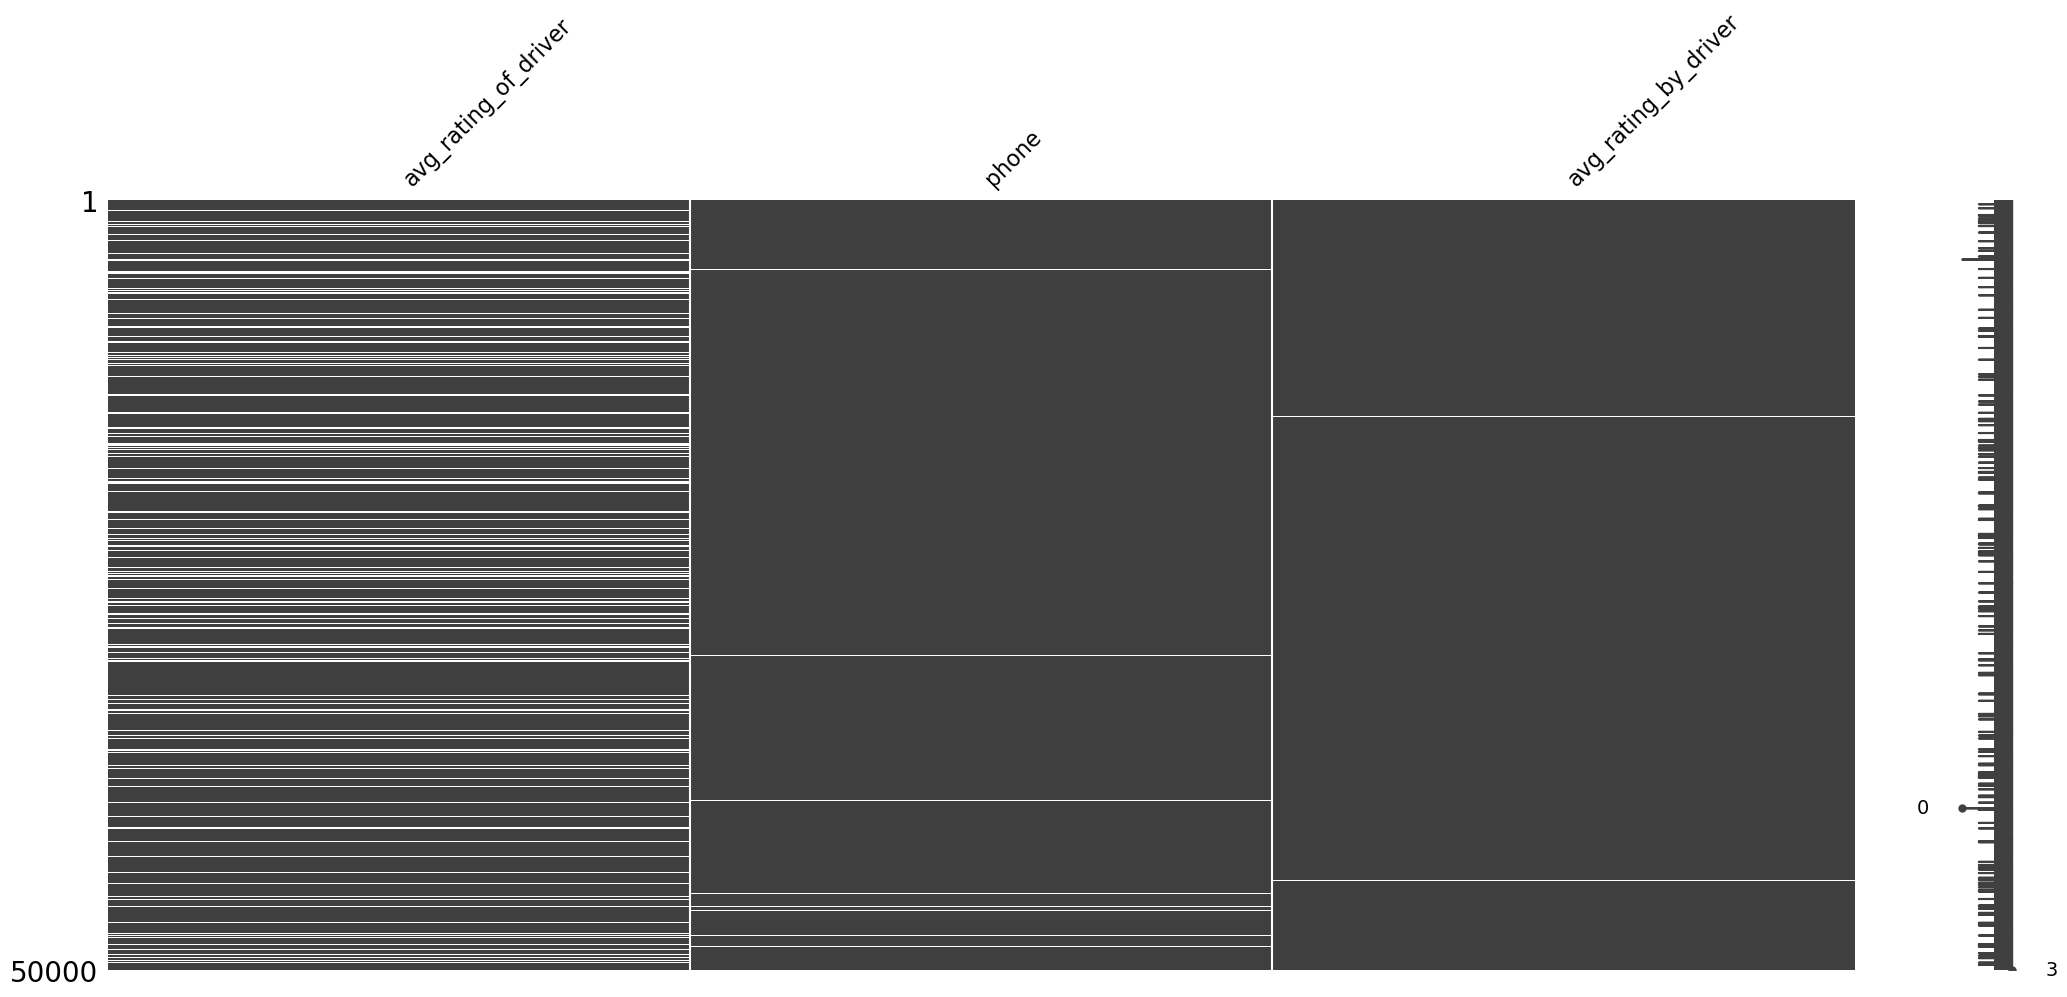

In [9]:
import missingno
missingdata_df = ultimate.columns[ultimate.isnull().any()].tolist()
missingno.matrix(ultimate[missingdata_df])

Before deciding how to handle the missing values, I visualize the data before cleaning.

In [10]:
df_numerics_only = ultimate.select_dtypes(include=np.number)
df_numerics_only.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,4,4.7,1.10,15.4,46.2,3.67,5.0
1,0,5.0,1.00,0.0,50.0,8.26,5.0
2,3,4.3,1.00,0.0,100.0,0.77,5.0
3,9,4.6,1.14,20.0,80.0,2.36,4.9
4,14,4.4,1.19,11.8,82.4,3.13,4.9


In [11]:
nan_num_rows = df_numerics_only[df_numerics_only.isnull().T.any()]

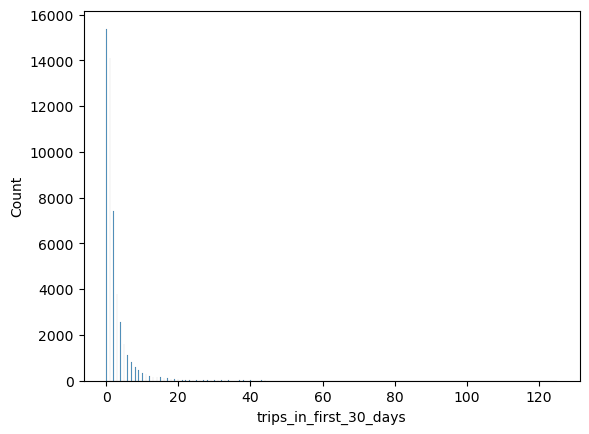

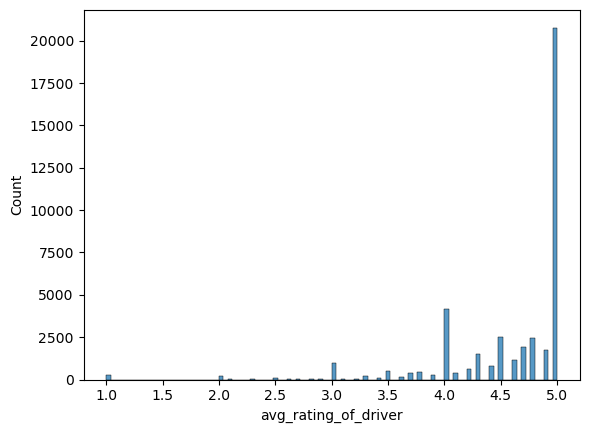

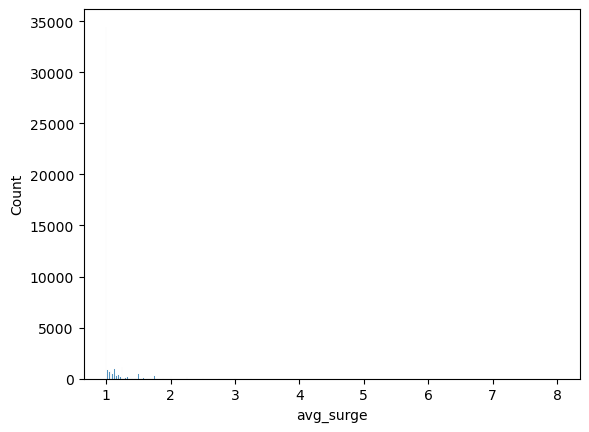

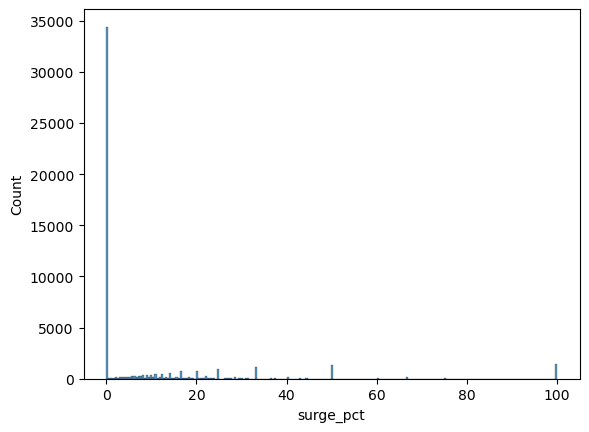

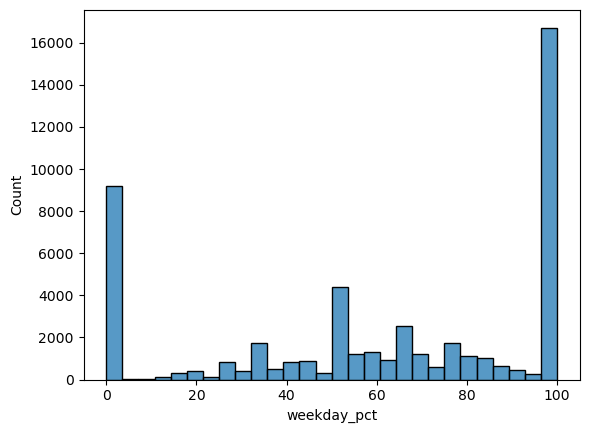

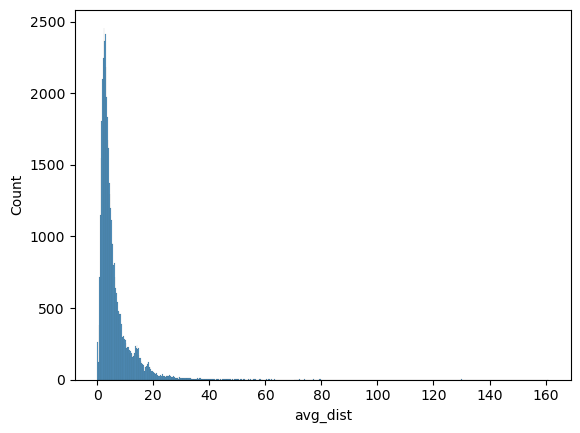

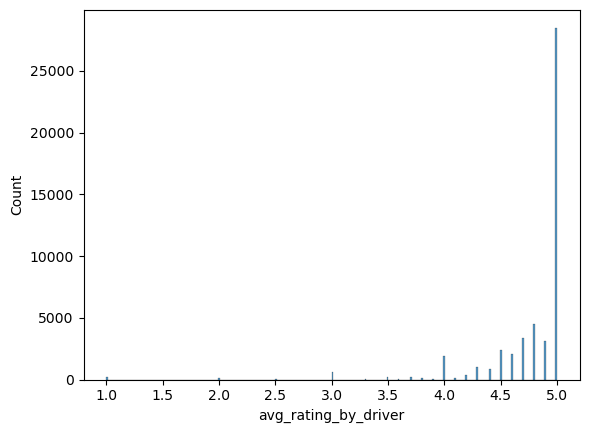

In [12]:
for column in df_numerics_only.columns:
    plt.figure() 
    sns.histplot(df_numerics_only[column])

The histogram for the column avg_surge is difficult to interpret.  I will look at this column other ways to try to determine what is happening here.

<AxesSubplot: >

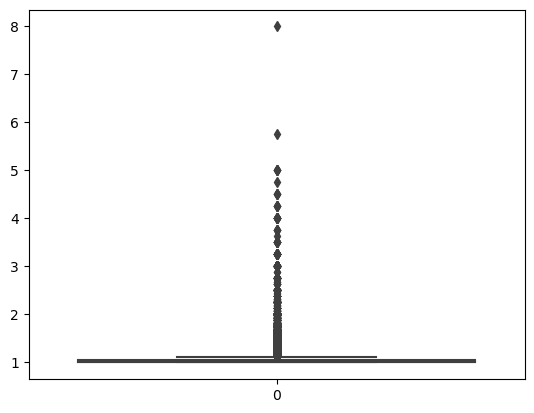

In [13]:
sns.boxplot(data = df_numerics_only['avg_surge'])

While the average is very low, around 1 or slightly more than 1.  It looks like there are a few high outliers that may be interfering with visualizing it on a histogram.

In [14]:
df_numerics_only['avg_surge'].value_counts()

1.00    34454
1.25     1100
1.13      956
1.02      809
1.08      798
        ...  
1.77        1
4.75        1
1.90        1
1.51        1
3.63        1
Name: avg_surge, Length: 115, dtype: int64

In [15]:
df_numerics_only.loc[df_numerics_only.avg_surge > 4]

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
1405,1,5.0,4.75,100.0,100.0,6.46,5.0
2817,0,5.0,5.00,100.0,100.0,3.18,5.0
5355,1,5.0,4.25,100.0,100.0,0.69,5.0
10546,0,NaN,4.50,100.0,0.0,2.70,5.0
13861,1,1.0,8.00,100.0,100.0,5.77,5.0
15334,0,NaN,4.50,100.0,100.0,1.40,5.0
19191,1,5.0,5.00,100.0,100.0,3.37,5.0
21742,0,NaN,4.50,100.0,0.0,1.42,5.0
21894,1,NaN,5.00,100.0,100.0,2.46,4.0
25397,0,NaN,4.25,100.0,0.0,3.22,5.0


There are only 2 values in avg_surge that are above 5 and 17 above 4 (out of 50000 observations).  

In [16]:
len(df_numerics_only[(df_numerics_only['avg_surge'] > 0) & (df_numerics_only['avg_surge'] < 1.1)])

40440

On the other hand, there are over 40,000 observations where the average surge is less than 1.1.  This supports the thought that the rows with avg_surge above 4 are true outliers.  As these 17 rows represent only 0.034% of the data, I feel comfortable eliminating them.

In [17]:
df_numerics_only = df_numerics_only.drop(df_numerics_only[(df_numerics_only['avg_surge'] >= 5)].index)

In [18]:
df_numerics_only.shape

(49993, 7)

<AxesSubplot: ylabel='Count'>

C:\Users\crathgeb-pc\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


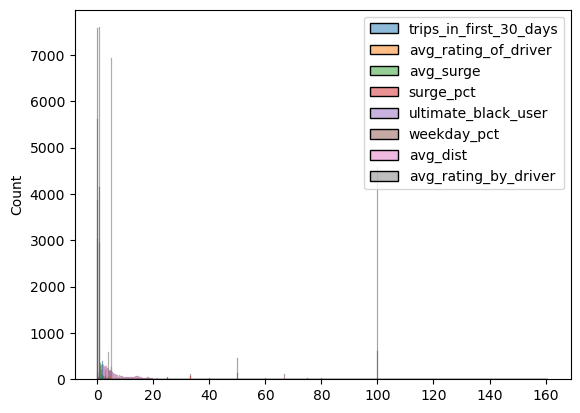

In [19]:
sns.histplot(nan_rows)

<AxesSubplot: ylabel='Count'>

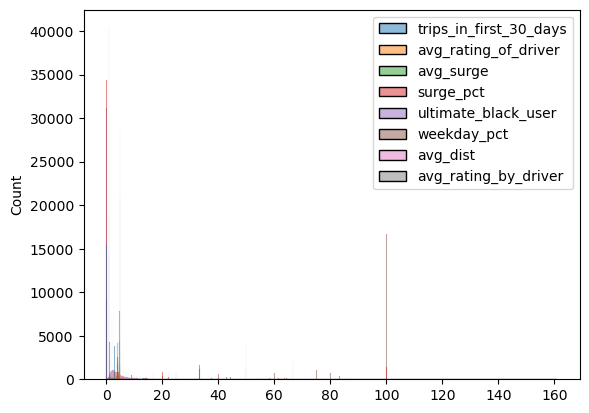

In [20]:
sns.histplot(ultimate)

Glancing at histograms of the observations with missing values compared to the full dataset, they do not seem to have glaring differences.  However, as there are over 8000 observations with at least one missing value, I will use the mean of the column with the missing value rather than drop so many rows.

In [21]:
mean = df_numerics_only.mean()
df_numerics_only.fillna(mean, inplace=True)

In [22]:
nan_rows_2 = df_numerics_only[df_numerics_only.isnull().T.any()]

In [23]:
nan_rows_2

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver


#### What fraction of the observed users were retained?

User is considered retained if they have taken a trip in the last 30 days.  The column last_trip_date indicates the most recent trip each has taken.  I will create a new dataframe with only observations with their most recent trip is 30 days or less from when the data was being examined.  As we are not given that date, I will work from the latest date in the dataframe and count those that rode during the 30 days preceding that latest date.

In [24]:
max(ultimate['last_trip_date'])

'2014-07-01'

In [25]:
reten = (ultimate[(ultimate['last_trip_date'] > '2014-06-01') & (ultimate['last_trip_date'] <= '2014-07-01')])

In [26]:
reten.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
13,King's Landing,0,2014-01-29,4.0,1.38,2014-06-08,iPhone,50.0,False,50.0,3.04,5.0
16,King's Landing,1,2014-01-11,5.0,1.00,2014-06-28,Android,0.0,True,50.0,10.86,3.0


In [27]:
reten.shape

(18310, 12)

In [28]:
ultimate.shape

(50000, 12)

18310 of 50000 (1831/5000) riders were retained.

#### 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [29]:
from datetime import datetime
import datetime as dt

In [30]:
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'].str.strip(), format='%Y-%m-%d')
ultimate['signup_date'] = pd.to_datetime(ultimate['signup_date'].str.strip(), format='%Y-%m-%d')

In [31]:
ultimate['time_active'] = (ultimate['last_trip_date'] - ultimate['signup_date'])

In [32]:
ultimate = pd.get_dummies(ultimate)

In [33]:
ultimate.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,time_active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,143 days,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,96 days,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,1 days,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,170 days,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,47 days,0,0,1,1,0


In [34]:
ultimate['days_active']=pd.to_timedelta(ultimate['time_active']).dt.days
ultimate['ultimate_black_user'] = ultimate['ultimate_black_user'].astype(int)

In [35]:
ultimate['sign_up_year'] = ultimate['signup_date'].apply(lambda time: time.year)
ultimate['sign_up_month'] = ultimate['signup_date'].apply(lambda time: time.month)
ultimate['sign_up_day'] = ultimate['signup_date'].apply(lambda time: time.day)
ultimate['last_trip_year'] = ultimate['last_trip_date'].apply(lambda time: time.year)
ultimate['last_trip_month'] = ultimate['last_trip_date'].apply(lambda time: time.month)
ultimate['last_trip_day'] = ultimate['last_trip_date'].apply(lambda time: time.day)

In [36]:
reten = ultimate[ultimate['time_active'].dt.days > 182]

In [37]:
reten

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,...,city_Winterfell,phone_Android,phone_iPhone,days_active,sign_up_year,sign_up_month,sign_up_day,last_trip_year,last_trip_month,last_trip_day


In [38]:
max(ultimate.time_active)

Timedelta('181 days 00:00:00')

In [39]:
ultimate['reten'] = ultimate['time_active'].dt.days >= 153

In [40]:
ultimate['reten'] = ultimate['reten'].astype(int)

In [41]:
ultimate = ultimate.copy()

In [42]:
ultimate = ultimate.drop(['signup_date', 'last_trip_date', 'time_active'], axis=1)

In [43]:
ultimate

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,...,phone_Android,phone_iPhone,days_active,sign_up_year,sign_up_month,sign_up_day,last_trip_year,last_trip_month,last_trip_day,reten
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,0,1,...,0,1,143,2014,1,25,2014,6,17,0
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,1,0,...,1,0,96,2014,1,29,2014,5,5,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,1,0,...,0,1,1,2014,1,6,2014,1,7,0
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,0,1,...,0,1,170,2014,1,10,2014,6,29,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,...,1,0,47,2014,1,27,2014,3,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.0,1.00,0.0,0,100.0,5.63,4.2,0,1,...,0,1,131,2014,1,25,2014,6,5,0
49996,1,NaN,1.00,0.0,0,0.0,0.00,4.0,1,0,...,0,1,1,2014,1,24,2014,1,25,0
49997,0,5.0,1.00,0.0,1,100.0,3.86,5.0,0,0,...,1,0,111,2014,1,31,2014,5,22,0
49998,2,3.0,1.00,0.0,0,100.0,4.58,3.5,1,0,...,0,1,1,2014,1,14,2014,1,15,0


In [44]:
ultimate.isnull().sum()

trips_in_first_30_days       0
avg_rating_of_driver      8122
avg_surge                    0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
city_Astapor                 0
city_King's Landing          0
city_Winterfell              0
phone_Android                0
phone_iPhone                 0
days_active                  0
sign_up_year                 0
sign_up_month                0
sign_up_day                  0
last_trip_year               0
last_trip_month              0
last_trip_day                0
reten                        0
dtype: int64

Before designing models to predict whether a user will still be active after 6 months, I need to ensure that the models will not be skewed by multicollinearity between explanatory variables.  Similarly, we want to remove any explanatory variables that are obviously contained in the dependent variable.  For example, days active is how we determined retention.  Therefore keeping this variable with our "independent" explanatory ("X) variables could create fairly useless models.  I am also concerned about the signup dates (particularly year and month) and whether these might be best dropped.

<AxesSubplot: xlabel='sign_up_year'>

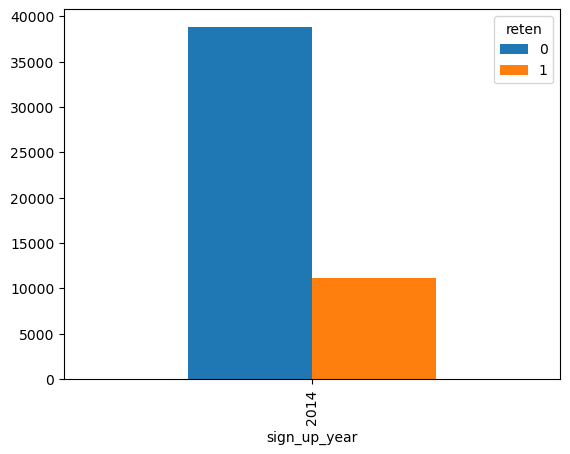

In [45]:
ultimate.groupby('sign_up_year').reten.value_counts().unstack().plot.bar()

With all observations having the same sign-up year, this variable is not useful.

<AxesSubplot: xlabel='sign_up_month', ylabel='count'>

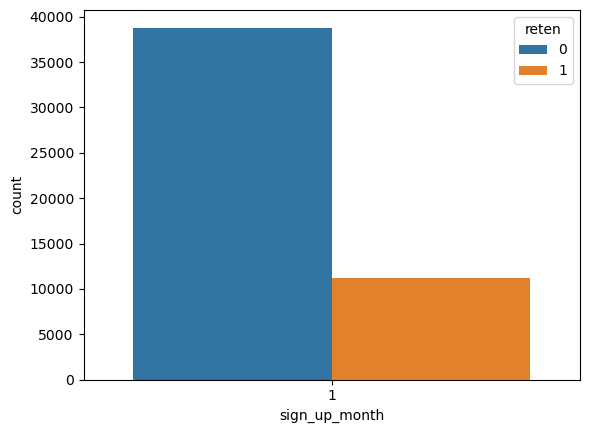

In [46]:
sns.countplot(data=ultimate, x='sign_up_month', hue='reten') 

With all observations having the same sign-up month, this variable is also not useful.

In [47]:
ultimate['sign_up_month'].value_counts()

1    50000
Name: sign_up_month, dtype: int64

<AxesSubplot: xlabel='last_trip_year', ylabel='count'>

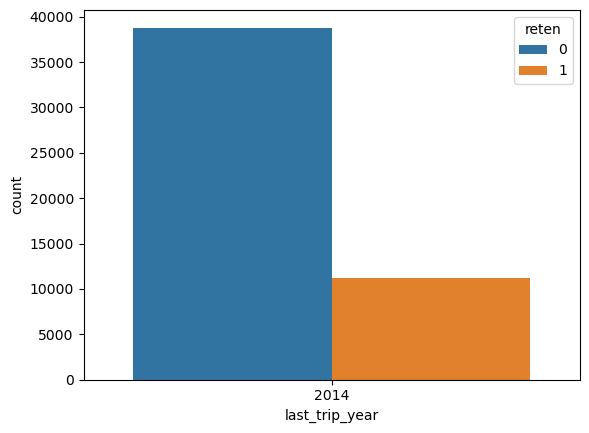

In [48]:
sns.countplot(data=ultimate, x='last_trip_year', hue='reten') 

<AxesSubplot: xlabel='last_trip_month', ylabel='count'>

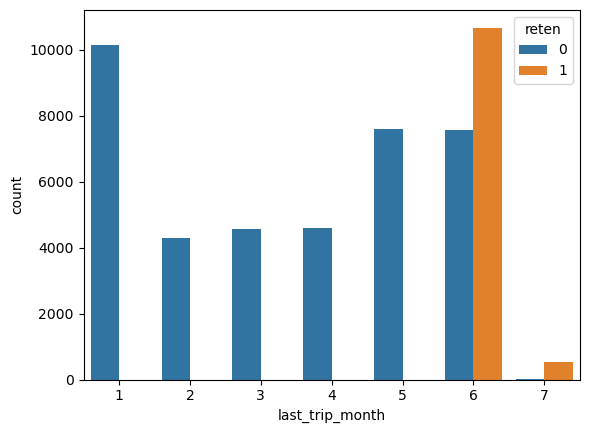

In [49]:
sns.countplot(data=ultimate, x='last_trip_month', hue='reten') 

While the last trip month is more varying than some of the previous variables, it is too closely related to the dependent variable to be very useful.

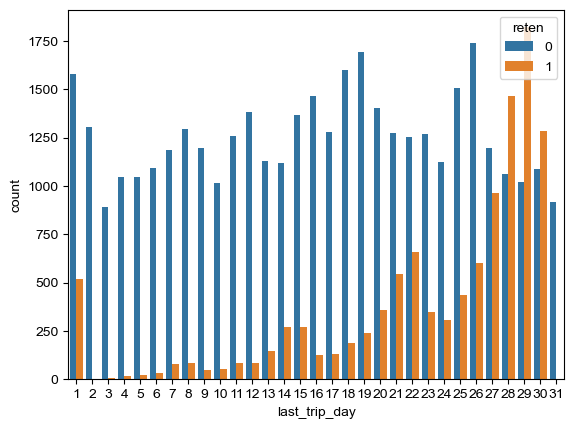

In [50]:
sns.countplot(data=ultimate, x='last_trip_day', hue='reten') 
sns.set(rc={'figure.figsize':(16,8)})

<AxesSubplot: xlabel='sign_up_day', ylabel='count'>

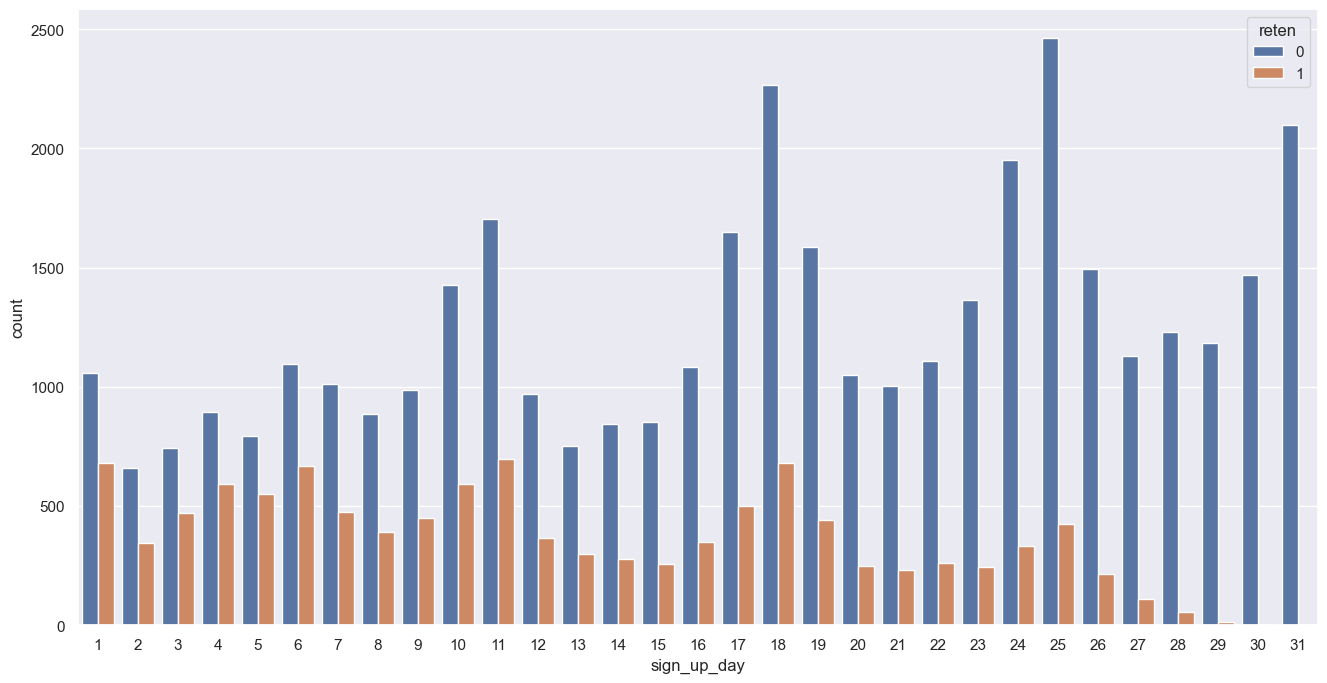

In [51]:
sns.countplot(data=ultimate, x='sign_up_day', hue='reten') 

I first kept the variables "sign up day" and "last trip day" to run the models.  These both appeared to be important features.  However, after graphing these, as seen above, I decided to drop them and run the models again.  This is because of the trends seen in both.  In sign up day, those customers who are retained longer than 6 months were more likely to have signed up early in the signup month.  I suspect that this reflects that those who signed up later in the month had less time to indicates rides they took more than 6 months later during the data collection time.  Similarly, during the last month, those who rode later in the month may have had more time for the data collection to reflect that they were continuing to ride than those whose latest ride was earlier in the month.  If this is the case, insights about signup day or last ride day may not be useful.  If we could gather information over a longer period of time, such as a year or more, we might be able to determine whether date in a month has a larger impact.

In [52]:
ultimate = ultimate.drop(['sign_up_year', 'sign_up_month', 'last_trip_year', 'last_trip_month', 'days_active', 'sign_up_day', 'last_trip_day'], axis=1)

In [53]:
ultimate

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,reten
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,0,1,0,0,1,0
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,1,0,0,1,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,1,0,0,0,1,0
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,0,1,0,0,1,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.0,1.00,0.0,0,100.0,5.63,4.2,0,1,0,0,1,0
49996,1,NaN,1.00,0.0,0,0.0,0.00,4.0,1,0,0,0,1,0
49997,0,5.0,1.00,0.0,1,100.0,3.86,5.0,0,0,1,1,0,0
49998,2,3.0,1.00,0.0,0,100.0,4.58,3.5,1,0,0,0,1,0


In [54]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
ultimate[:]= imputer.fit_transform(ultimate)

C:\Users\crathgeb-pc\AppData\Local\Temp\ipykernel_20676\1919775201.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  ultimate[:]= imputer.fit_transform(ultimate)


In [55]:
ultimate.isnull().sum()

trips_in_first_30_days    0
avg_rating_of_driver      0
avg_surge                 0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
city_Astapor              0
city_King's Landing       0
city_Winterfell           0
phone_Android             0
phone_iPhone              0
reten                     0
dtype: int64

In [56]:
X = ultimate.iloc[:, 0:-1]
y = ultimate.iloc[:, -1]

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)
print(X_train, y_train, X_test, y_test)

       trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
11681                     3.0              5.000000       1.17       33.3   
24009                     6.0              3.800000       1.00        0.0   
40502                     1.0              4.601559       1.00        0.0   
755                       1.0              5.000000       1.30       20.0   
26143                     1.0              5.000000       1.00        0.0   
...                       ...                   ...        ...        ...   
31240                     1.0              5.000000       1.00        0.0   
40664                     1.0              4.601559       1.00        0.0   
39078                     0.0              4.000000       1.02       10.0   
49881                     4.0              4.300000       1.00        0.0   
8261                      1.0              5.000000       1.00        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \


Try various models, binary classification models:  binary logistic regression, k-nearest neighbors (do I also want to try some tree-based classification models for comparison?)

In [58]:
X_train.dtypes

trips_in_first_30_days    float64
avg_rating_of_driver      float64
avg_surge                 float64
surge_pct                 float64
ultimate_black_user       float64
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
city_Astapor              float64
city_King's Landing       float64
city_Winterfell           float64
phone_Android             float64
phone_iPhone              float64
dtype: object

In [59]:
y_train.dtypes

dtype('float64')

In [60]:
X_test.dtypes

trips_in_first_30_days    float64
avg_rating_of_driver      float64
avg_surge                 float64
surge_pct                 float64
ultimate_black_user       float64
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
city_Astapor              float64
city_King's Landing       float64
city_Winterfell           float64
phone_Android             float64
phone_iPhone              float64
dtype: object

In [61]:
y_test.dtypes

dtype('float64')

In [62]:
X_train

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
11681,3.0,5.000000,1.17,33.3,0.0,33.3,1.64,3.3,1.0,0.0,0.0,0.0,1.0
24009,6.0,3.800000,1.00,0.0,0.0,100.0,4.44,5.0,0.0,0.0,1.0,0.0,1.0
40502,1.0,4.601559,1.00,0.0,0.0,0.0,1.92,4.5,0.0,0.0,1.0,1.0,0.0
755,1.0,5.000000,1.30,20.0,1.0,0.0,2.05,4.0,0.0,1.0,0.0,0.0,1.0
26143,1.0,5.000000,1.00,0.0,0.0,0.0,3.84,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31240,1.0,5.000000,1.00,0.0,1.0,100.0,13.00,5.0,1.0,0.0,0.0,0.0,1.0
40664,1.0,4.601559,1.00,0.0,0.0,0.0,4.28,5.0,0.0,0.0,1.0,1.0,0.0
39078,0.0,4.000000,1.02,10.0,1.0,60.0,1.57,4.8,0.0,0.0,1.0,0.0,1.0
49881,4.0,4.300000,1.00,0.0,0.0,100.0,2.21,5.0,0.0,1.0,0.0,1.0,0.0


### Logistic regression model

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing

In [64]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [65]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
lr = log_reg.fit(X_tr_scaled, y_train)
y_tr_pred = lr.predict(X_tr_scaled)
y_te_pred = lr.predict(X_te_scaled)

In [66]:
cm_train = confusion_matrix(y_train, y_tr_pred)
cm_test = confusion_matrix(y_test, y_te_pred)

In [67]:
val_tr = np.mat(cm_train)
names = list(set(y_train))
df_cm_tr = pd.DataFrame(val_tr, index=names, columns=names)

val_te = np.mat(cm_test)
names = list(set(y_test))
df_cm_te = pd.DataFrame(val_te, index=names, columns=names)

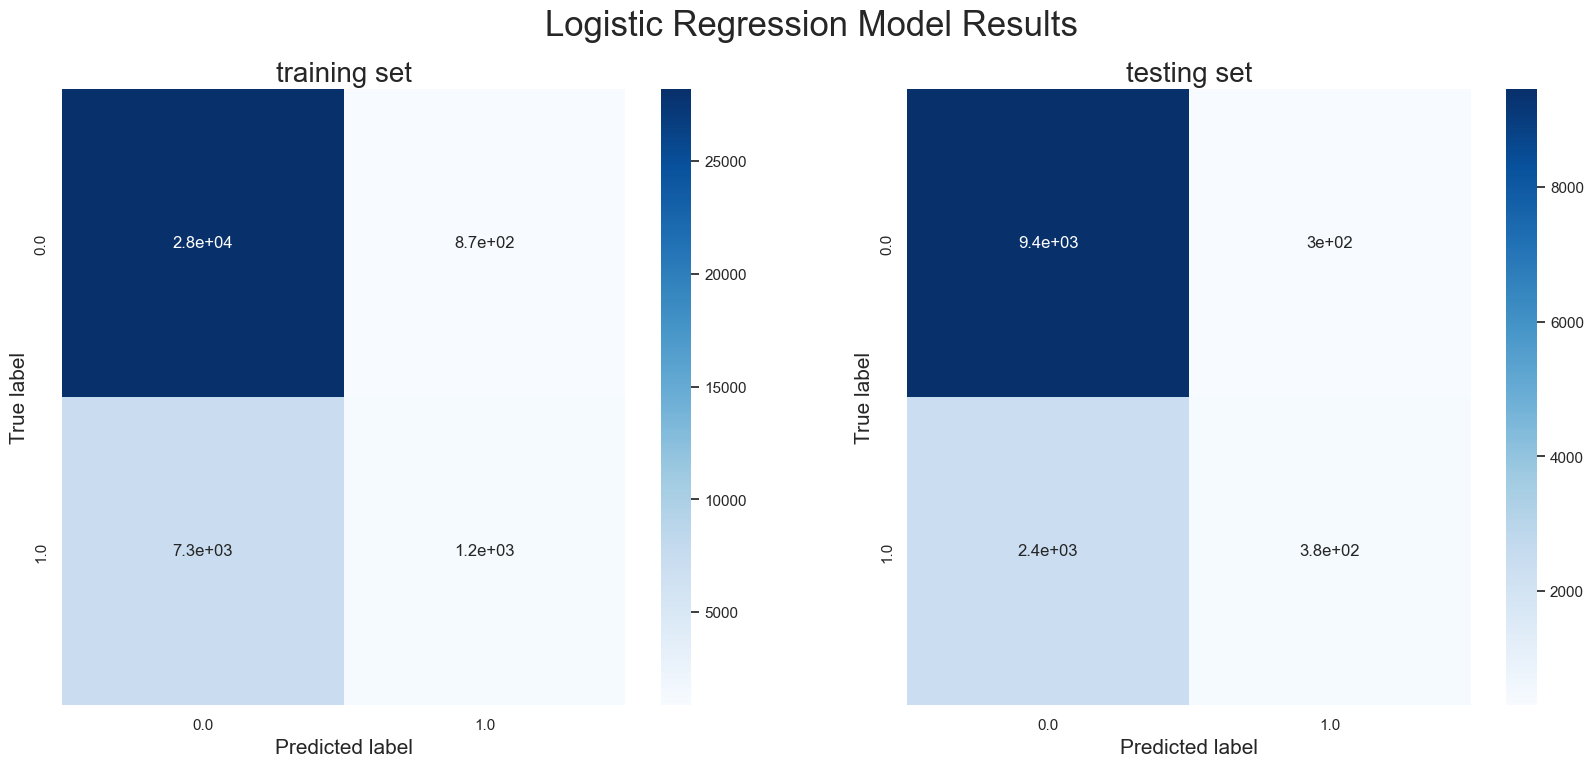

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

heatmap = sns.heatmap(df_cm_tr, annot=True, cmap="Blues", ax=ax1)

ax1.set_xlabel("Predicted label", fontsize=15)
ax1.set_ylabel("True label", fontsize=15)
ax1.set_title('training set', fontsize=20)

heatmap = sns.heatmap(df_cm_te, annot=True, cmap="Blues", ax=ax2)

ax2.set_xlabel("Predicted label", fontsize=15)
ax2.set_ylabel("True label", fontsize=15)
ax2.set_title('testing set', fontsize=20)

fig.suptitle('Logistic Regression Model Results', fontsize=25)
plt.show() 

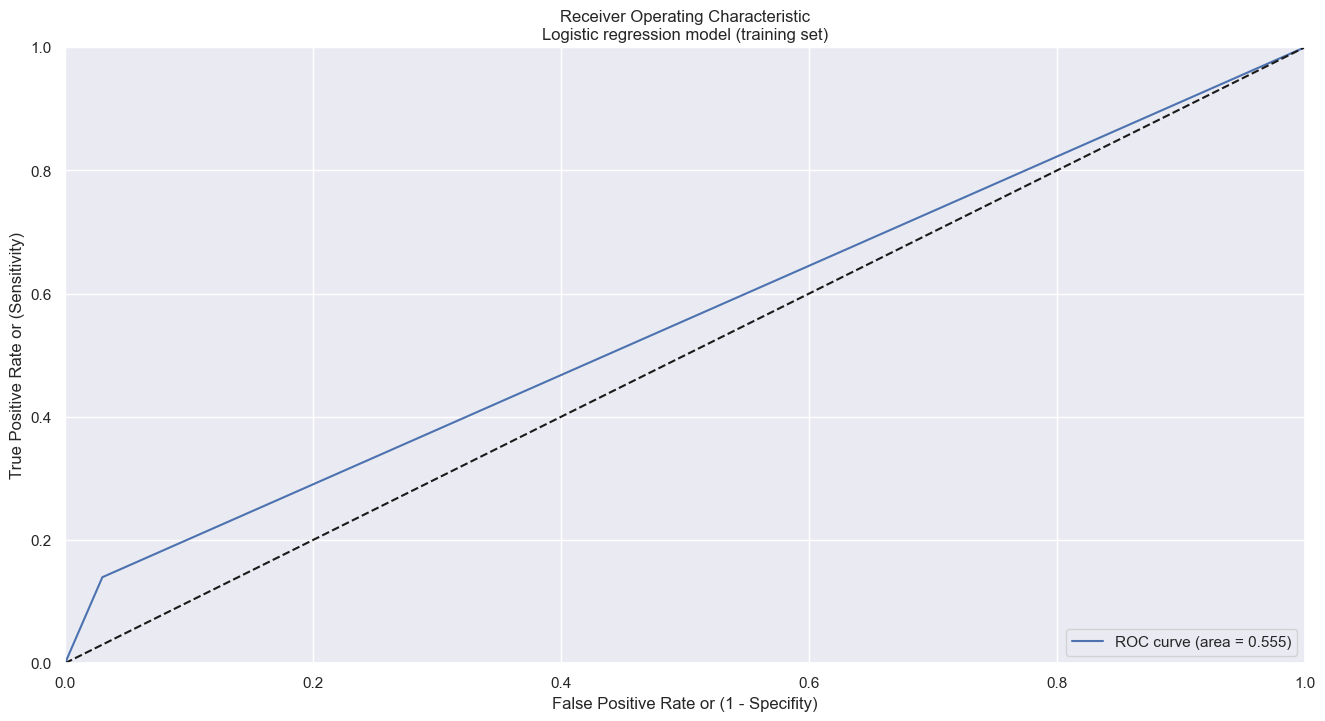

In [69]:
fpr, tpr, thresholds = roc_curve(y_train, y_tr_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic\nLogistic regression model (training set)')
plt.legend(loc="lower right")

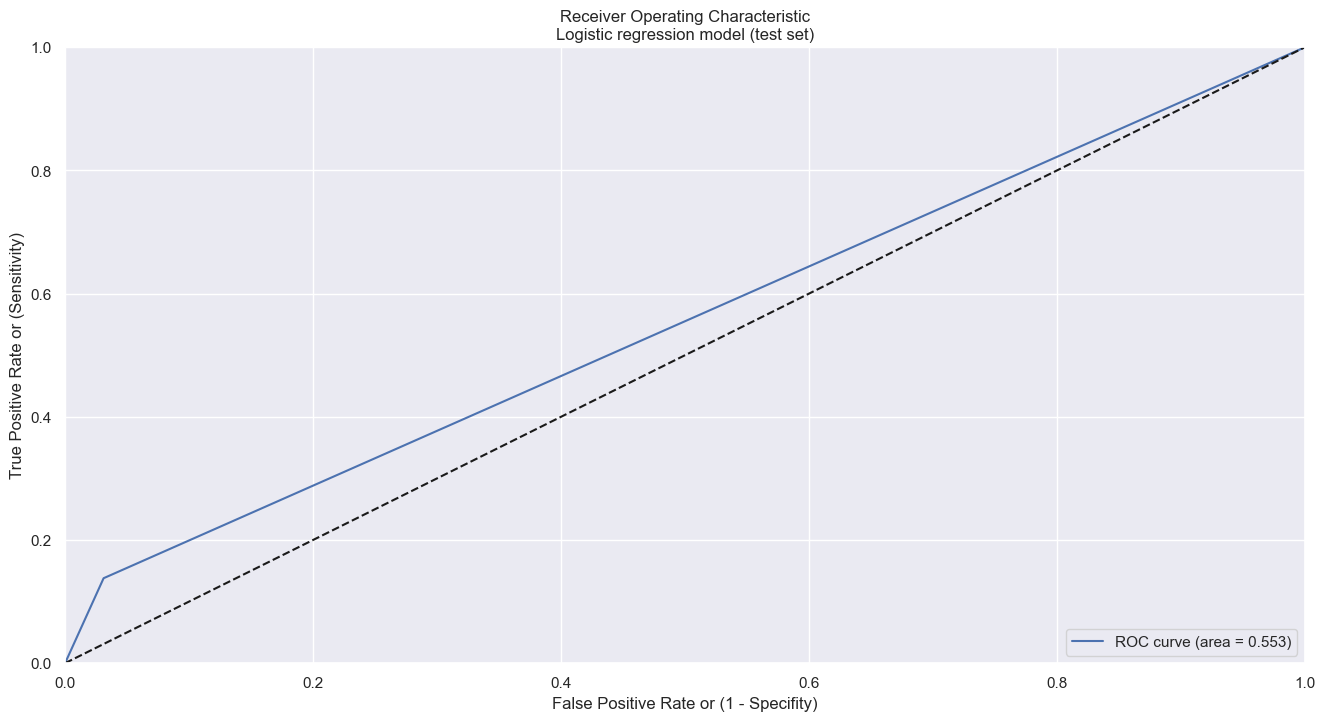

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_te_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic\nLogistic regression model (test set)')
plt.legend(loc="lower right")

In [71]:
accuracy = metrics.accuracy_score(y_train, y_tr_pred)
precision = metrics.precision_score(y_train, y_tr_pred)
recall_sensitivity = metrics.recall_score(y_train, y_tr_pred, pos_label=1)
specificity = metrics.recall_score(y_train, y_tr_pred, pos_label=0)
f1 = metrics.f1_score(y_train, y_tr_pred)
roc = metrics.roc_auc_score(y_train, y_tr_pred)

print('accuracy:', accuracy, ', precision:', precision, ', recall/sensitivity:', recall_sensitivity, ', specificity:', specificity, ', f1:', f1, ', roc-auc:', roc)

accuracy: 0.7829066666666666 , precision: 0.5742815392109109 , recall/sensitivity: 0.13959270660667772 , specificity: 0.9699180835685276 , f1: 0.22459281836365366 , roc-auc: 0.5547553950876027


In [72]:
data = [['Log reg (train)', accuracy, precision, recall_sensitivity, specificity, f1, roc]]
  
# Create the pandas DataFrame
met = pd.DataFrame(data, columns=['Model Name', 'accuracy', 'precision', 'recall', 'specificity', 'f1', 'roc-auc'])
  
# print dataframe.
met

,Model Name,accuracy,precision,recall,specificity,f1,roc-auc
0,Log reg (train),0.782907,0.574282,0.139593,0.969918,0.224593,0.554755


In [73]:
def insert_row2(idx, df, df_insert):
    dfA = df.iloc[:idx, ]
    dfB = df.iloc[idx:, ]

    tmp = pd.concat([dfA, df_insert])
    df = pd.concat([tmp, dfB])
    df.reset_index(drop=True, inplace=True)
    
    return df

In [74]:
accuracy = metrics.accuracy_score(y_test, y_te_pred)
precision = metrics.precision_score(y_test, y_te_pred)
recall_sensitivity = metrics.recall_score(y_test, y_te_pred, pos_label=1)
specificity = metrics.recall_score(y_test, y_te_pred, pos_label=0)
f1 = metrics.f1_score(y_test, y_te_pred)
roc = metrics.roc_auc_score(y_test, y_te_pred)

print('accuracy:', accuracy, ', precision:', precision, ', recall/sensitivity:', recall_sensitivity, ', specificity:', specificity, ', f1:', f1, ', roc-auc:', roc)

accuracy: 0.78624 , precision: 0.5557184750733137 , recall/sensitivity: 0.13791848617176128 , specificity: 0.968929450369155 , f1: 0.22099125364431485 , roc-auc: 0.5534239682704581


In [75]:
data2 = [['Log reg (test)', accuracy, precision, recall_sensitivity, specificity, f1, roc]]
  
met2 = pd.DataFrame(data2, columns=['Model Name', 'accuracy', 'precision', 'recall', 'specificity', 'f1', 'roc-auc'])

In [76]:
met = insert_row2(1, met, met2)
met

,Model Name,accuracy,precision,recall,specificity,f1,roc-auc
0,Log reg (train),0.782907,0.574282,0.139593,0.969918,0.224593,0.554755
1,Log reg (test),0.786240,0.555718,0.137918,0.968929,0.220991,0.553424


### K-nearest neighbors model

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)
y_tr_pred = knn_model.predict(X_train)
y_te_pred = knn_model.predict(X_test)

C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\crathgeb-pc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. 

In [78]:
cm_train = confusion_matrix(y_train, y_tr_pred)
cm_test = confusion_matrix(y_test, y_te_pred)

In [79]:
val_tr = np.mat(cm_train)
names = list(set(y_train))
df_cm_tr = pd.DataFrame(val_tr, index=names, columns=names)

val_te = np.mat(cm_test)
names = list(set(y_test))
df_cm_te = pd.DataFrame(val_te, index=names, columns=names)

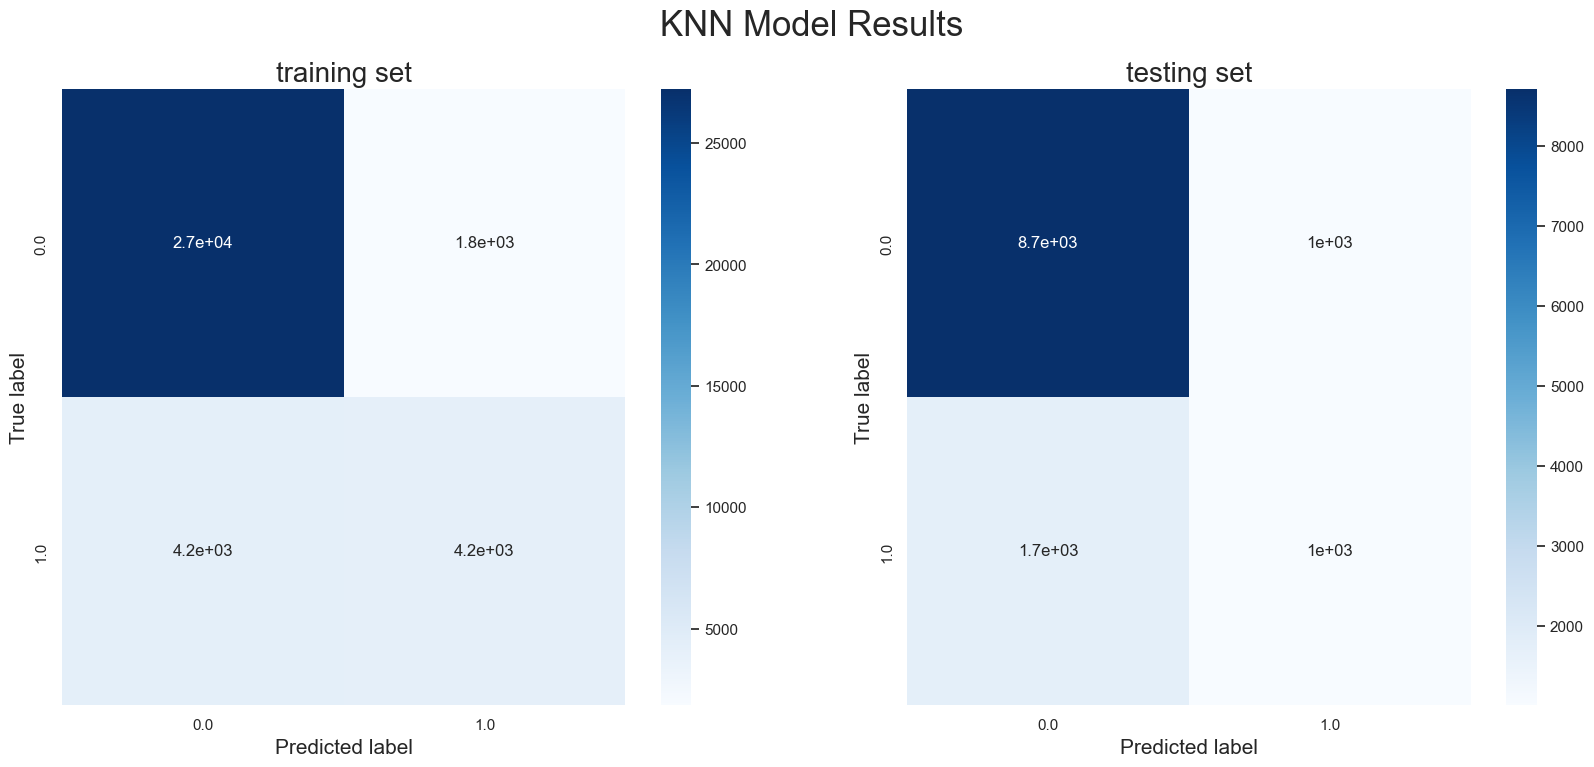

In [80]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

heatmap = sns.heatmap(df_cm_tr, annot=True, cmap="Blues", ax=ax1)

ax1.set_xlabel("Predicted label", fontsize=15)
ax1.set_ylabel("True label", fontsize=15)
ax1.set_title('training set', fontsize=20)

heatmap = sns.heatmap(df_cm_te, annot=True, cmap="Blues", ax=ax2)

ax2.set_xlabel("Predicted label", fontsize=15)
ax2.set_ylabel("True label", fontsize=15)
ax2.set_title('testing set', fontsize=20)

fig.suptitle('KNN Model Results', fontsize=25)
plt.show()

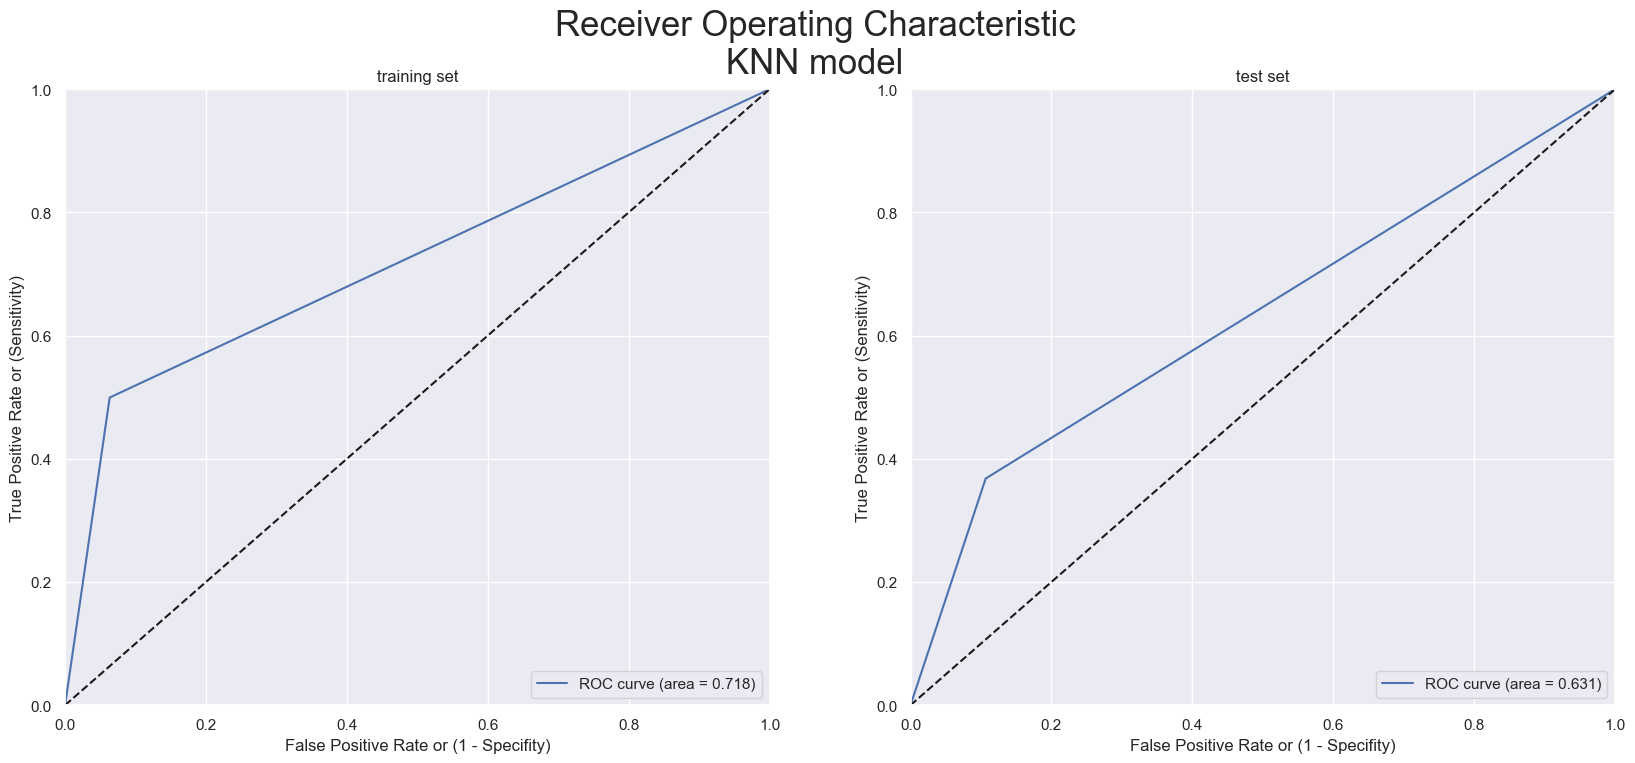

In [81]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

fpr, tpr, thresholds = roc_curve(y_train, y_tr_pred)
roc_auc = auc(fpr, tpr)

ax1.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
ax1.plot([0, 1], [0, 1], 'k--')  # random predictions curve
ax1.set_xlim(0.0, 1.0)
ax1.set_ylim(0.0, 1.0)
ax1.set_xlabel('False Positive Rate or (1 - Specifity)')
ax1.set_ylabel('True Positive Rate or (Sensitivity)')
ax1.set_title('training set')
ax1.legend(loc="lower right")

fpr1, tpr1, thresholds = roc_curve(y_test, y_te_pred)
roc_auc1 = auc(fpr1, tpr1)

ax2.plot(fpr1, tpr1, label='ROC curve (area = %0.3f)' % roc_auc1)
ax2.plot([0, 1], [0, 1], 'k--')  # random predictions curve
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel('False Positive Rate or (1 - Specifity)')
ax2.set_ylabel('True Positive Rate or (Sensitivity)')
ax2.set_title('test set')
ax2.legend(loc="lower right")

fig.suptitle('Receiver Operating Characteristic\nKNN model', fontsize=25)
plt.show()

In [82]:
accuracy = metrics.accuracy_score(y_train, y_tr_pred)
precision = metrics.precision_score(y_train, y_tr_pred)
recall_sensitivity = metrics.recall_score(y_train, y_tr_pred, pos_label=1)
specificity = metrics.recall_score(y_train, y_tr_pred, pos_label=0)
f1 = metrics.f1_score(y_train, y_tr_pred)
roc = metrics.roc_auc_score(y_train, y_tr_pred)

print('accuracy:', accuracy, ', precision:', precision, ', recall/sensitivity:', recall_sensitivity, ', specificity:', specificity, ', f1:', f1, ', roc-auc:', roc)

accuracy: 0.8381866666666666 , precision: 0.6962693958402113 , recall/sensitivity: 0.49940800378877576 , specificity: 0.9366696496179527 , f1: 0.5816326530612245 , roc-auc: 0.7180388267033643


In [83]:
data3 = [['KNN (train)', accuracy, precision, recall_sensitivity, specificity, f1, roc]]
  
met3 = pd.DataFrame(data3, columns=['Model Name', 'accuracy', 'precision', 'recall', 'specificity', 'f1', 'roc-auc'])

In [84]:
met = insert_row2(2, met, met3)
met

,Model Name,accuracy,precision,recall,specificity,f1,roc-auc
0,Log reg (train),0.782907,0.574282,0.139593,0.969918,0.224593,0.554755
1,Log reg (test),0.786240,0.555718,0.137918,0.968929,0.220991,0.553424
2,KNN (train),0.838187,0.696269,0.499408,0.936670,0.581633,0.718039


In [85]:
accuracy = metrics.accuracy_score(y_test, y_te_pred)
precision = metrics.precision_score(y_test, y_te_pred)
recall_sensitivity = metrics.recall_score(y_test, y_te_pred, pos_label=1)
specificity = metrics.recall_score(y_test, y_te_pred, pos_label=0)
f1 = metrics.f1_score(y_test, y_te_pred)
roc = metrics.roc_auc_score(y_test, y_te_pred)

print('accuracy:', accuracy, ', precision:', precision, ', recall/sensitivity:', recall_sensitivity, ', specificity:', specificity, ', f1:', f1, ', roc-auc:', roc)

accuracy: 0.77784 , precision: 0.4929302779132131 , recall/sensitivity: 0.36790393013100436 , specificity: 0.8933552091878589 , f1: 0.4213377787038966 , roc-auc: 0.6306295696594316


In [86]:
data4 = [['KNN (test)', accuracy, precision, recall_sensitivity, specificity, f1, roc]]
  
met4 = pd.DataFrame(data4, columns=['Model Name', 'accuracy', 'precision', 'recall', 'specificity', 'f1', 'roc-auc'])

In [87]:
met = insert_row2(3, met, met4)
met

,Model Name,accuracy,precision,recall,specificity,f1,roc-auc
0,Log reg (train),0.782907,0.574282,0.139593,0.969918,0.224593,0.554755
1,Log reg (test),0.786240,0.555718,0.137918,0.968929,0.220991,0.553424
2,KNN (train),0.838187,0.696269,0.499408,0.936670,0.581633,0.718039
3,KNN (test),0.777840,0.492930,0.367904,0.893355,0.421338,0.630630


In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
sc = StandardScaler()
normed_train_data = pd.DataFrame(sc.fit_transform(X_train))
normed_test_data = pd.DataFrame(sc.fit_transform(X_test))

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
clf=RandomForestClassifier()
clf.fit(normed_train_data, y_train)

RandomForestClassifier()

In [93]:
y_preds = clf.predict(normed_test_data)
y_tr_preds = clf.predict(normed_train_data)

In [94]:
pd.DataFrame(clf.feature_importances_, index=X.columns).sort_values(by=0)

,0
city_Winterfell,0.008443
city_Astapor,0.011078
phone_iPhone,0.011863
phone_Android,0.011901
city_King's Landing,0.020583
ultimate_black_user,0.022660
avg_surge,0.085872
trips_in_first_30_days,0.087476
surge_pct,0.091101
avg_rating_of_driver,0.094600


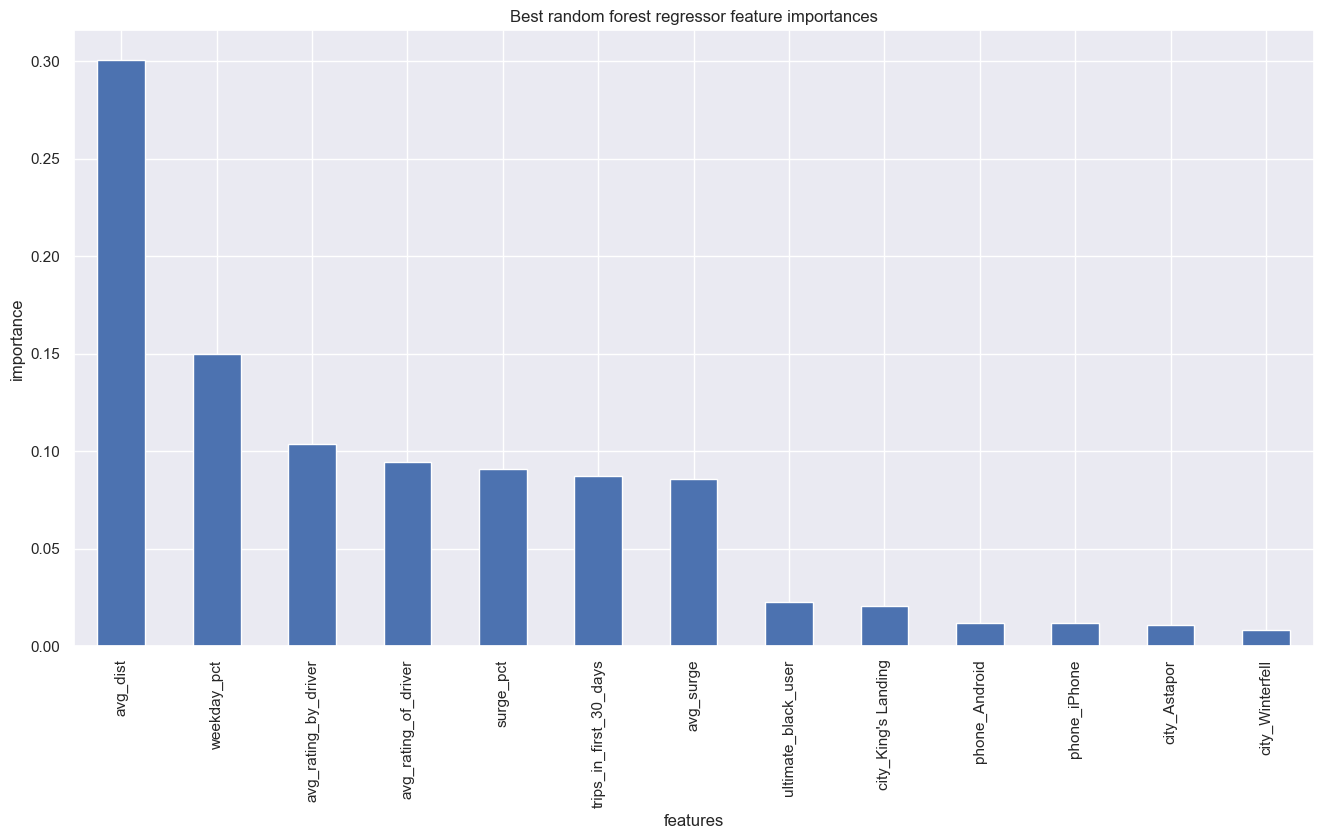

In [95]:
imps = clf.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [96]:
accuracy = metrics.accuracy_score(y_train, y_tr_preds)
precision = metrics.precision_score(y_train, y_tr_preds)
recall_sensitivity = metrics.recall_score(y_train, y_tr_preds, pos_label=1)
specificity = metrics.recall_score(y_train, y_tr_preds, pos_label=0)
f1 = metrics.f1_score(y_train, y_tr_preds)
roc = metrics.roc_auc_score(y_train, y_tr_preds)

print('accuracy:', accuracy, ', precision:', precision, ', recall/sensitivity:', recall_sensitivity, ', specificity:', specificity, ', f1:', f1, ', roc-auc:', roc)

accuracy: 0.9981333333333333 , precision: 0.9990467111534795 , recall/sensitivity: 0.9926592469808193 , specificity: 0.9997246506505129 , f1: 0.9958427366670626 , roc-auc: 0.9961919488156661


In [97]:
data5 = [['Random forest(train)', accuracy, precision, recall_sensitivity, specificity, f1, roc]]
  
met5 = pd.DataFrame(data5, columns=['Model Name', 'accuracy', 'precision', 'recall', 'specificity', 'f1', 'roc-auc'])

In [98]:
met = insert_row2(4, met, met5)
met

,Model Name,accuracy,precision,recall,specificity,f1,roc-auc
0,Log reg (train),0.782907,0.574282,0.139593,0.969918,0.224593,0.554755
1,Log reg (test),0.786240,0.555718,0.137918,0.968929,0.220991,0.553424
2,KNN (train),0.838187,0.696269,0.499408,0.936670,0.581633,0.718039
3,KNN (test),0.777840,0.492930,0.367904,0.893355,0.421338,0.630630
4,Random forest(train),0.998133,0.999047,0.992659,0.999725,0.995843,0.996192


In [99]:
accuracy = metrics.accuracy_score(y_test, y_preds)
precision = metrics.precision_score(y_test, y_preds)
recall_sensitivity = metrics.recall_score(y_test, y_preds, pos_label=1)
specificity = metrics.recall_score(y_test, y_preds, pos_label=0)
f1 = metrics.f1_score(y_test, y_preds)
roc = metrics.roc_auc_score(y_test, y_preds)

print('accuracy:', accuracy, ', precision:', precision, ', recall/sensitivity:', recall_sensitivity, ', specificity:', specificity, ', f1:', f1, ', roc-auc:', roc)

accuracy: 0.78664 , precision: 0.5193687230989957 , recall/sensitivity: 0.3951965065502183 , specificity: 0.8969442165709598 , f1: 0.44885306881587106 , roc-auc: 0.6460703615605891


In [100]:
data6 = [['Random forest(test)', accuracy, precision, recall_sensitivity, specificity, f1, roc]]
  
met6 = pd.DataFrame(data6, columns=['Model Name', 'accuracy', 'precision', 'recall', 'specificity', 'f1', 'roc-auc'])

In [101]:
met = insert_row2(5, met, met6)
met

,Model Name,accuracy,precision,recall,specificity,f1,roc-auc
0,Log reg (train),0.782907,0.574282,0.139593,0.969918,0.224593,0.554755
1,Log reg (test),0.786240,0.555718,0.137918,0.968929,0.220991,0.553424
2,KNN (train),0.838187,0.696269,0.499408,0.936670,0.581633,0.718039
3,KNN (test),0.777840,0.492930,0.367904,0.893355,0.421338,0.630630
4,Random forest(train),0.998133,0.999047,0.992659,0.999725,0.995843,0.996192
5,Random forest(test),0.786640,0.519369,0.395197,0.896944,0.448853,0.646070


These metrics indicate that the models with the best metrics are logistic regression or random forest.  Logistic regression has the best precision and specificity, but very low recall and f1.  With random forest performing better as determined by f1 and roc-auc, I will use random forest for prediction.

In [ ]:
clf.predict(NewX)

In [107]:
from sklearn.datasets import make_blobs
Xnew, _ = make_blobs(n_samples=10, centers=None, n_features=13, random_state=42)
# make a prediction
ynew = clf.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[-6.82574962 -7.35608684 -6.22956212 -4.34776442 -0.16405367 -1.35716232
 -3.6976631   1.97802925 -7.78483199 -4.57860525 -2.33294217 -0.88598047
  6.47081607], Predicted=0.0
X=[-7.15631693 -0.49064734  2.62143223 -9.87281959  3.53491276 -5.18431222
 -7.30664239  8.09706993  9.38953561  5.67451448 -2.98456201 -6.33995277
  4.55824995], Predicted=0.0
X=[-6.04517046 -9.0186767  -5.98639186 -4.31067159  0.20599178 -0.9081633
 -4.3414781   2.45199672 -9.23243772 -5.10016384 -1.2688044  -0.89715112
  4.03001461], Predicted=0.0
X=[ -2.17101637  12.38658238   3.71948803   1.57453129  -6.94049128
  -8.29886005  -7.79583614   8.22705541   2.04130057   3.6270351
 -11.08336398   8.60893871   7.3925641 ], Predicted=0.0
X=[-4.09249184  9.78798655  4.10173717  0.62649159 -7.76021846 -8.0106619
 -8.70389887  7.90564571  2.91004869  5.05578389 -8.83331232  9.19103115
  6.02537542], Predicted=0.0
X=[-5.96537921 -6.79036945 -5.83046147 -2.75696849  0.7522455  -1.04658673
 -2.80355506  2.41261119 -7.51

As many of these randomly generated X-values contain negative number, which would not be contained in values for real drivers in this dataset, I will move the cluster centers to try to only generate positive numbers that might be more theoretically possible for this data.

In [119]:
X.mean()

trips_in_first_30_days     2.278200
avg_rating_of_driver       4.601559
avg_surge                  1.074764
surge_pct                  8.849536
ultimate_black_user        0.377080
weekday_pct               60.926084
avg_dist                   5.796827
avg_rating_by_driver       4.778158
city_Astapor               0.330680
city_King's Landing        0.202600
city_Winterfell            0.466720
phone_Android              0.300440
phone_iPhone               0.691640
dtype: float64

Examining the mean for each column of X shows that we would expect positive values, with the highest average at just over 60.  Therefore, we will define cluster centers in this range.

In [121]:
center_box = (0.000, 80.000) # defines the box that cluster centres are allowed to be in
X_new, _ = make_blobs(n_samples=10, n_features=13, center_box=center_box, random_state=42)
y_new = clf.predict(X_new)
# show the inputs and predicted outputs
for i in range(len(X_new)):
    print("X=%s, Predicted=%s" % (X_new[i], y_new[i]))

X=[15.91459702 13.5534112  14.77470847 23.90677016 41.32133223 34.5595388
 23.77608532 48.68920293 10.58479964 22.95007366 29.64876843 36.47821859
 63.58137375], Predicted=0.0
X=[14.82411    40.36341897 48.16630636  2.91420517 49.98760387 15.0471352
  6.59645319 75.03020216 77.32745759 64.17835537 25.29226414  9.52037407
 55.61223154], Predicted=0.0
X=[16.69517618 11.89082133 15.01787873 23.94386299 41.69137767 35.00853782
 23.13227031 49.16317041  9.13719392 22.42851507 30.7129062  36.46704793
 61.14057229], Predicted=0.0
X=[30.30139076 79.42944077 57.63912454 47.49404035 12.42062715 11.06081117
  5.68918059 70.19762415 48.10820127 56.11138977  0.15170567 76.80352984
 67.33912255], Predicted=0.0
X=[28.37991529 76.83084493 58.02137368 46.54600064 11.60089997 11.34900932
  4.78111786 69.87621446 48.9769494  57.54013855  2.40175734 77.38562228
 65.97193387], Predicted=0.0
X=[16.77496743 14.11912858 15.17380912 25.49756609 42.2376314  34.87011439
 24.67019335 49.12378487 10.85022031 24.04

Use best model to determine whether or not a user will be active in their 6th month on the system

Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model?

We chose a random forest model for predicting which customers will remain active six months.  This was the best model, with particularly good f1 and auc-roc metrics compared to other models we tested.  Using this to input a costumer's data would provide a reasonably good prediction for whether they would continue using the service after six months.  Validating the model using a testing set shows that the model performs less well on the testing set than training set.  This shows that it is not overfitting, but possibly could be underfitted.  However, the model performs well enough to be useful.  We could adjust the probability threshold in order to find more positive cases, but for the purpose of this model, identifying negative cases is likely the most important, and therefore, adjustment may not be needed.

A logistic regression model would be a reasonably good alternative to the chosen random forest model, as it performs well in precision and specificity.  Therefore, that model would perform well for finding negatives but would miss more positive cases than the random forest model.  Both models perform best for identifying users who will not be retained after six months and less well at identifying users who will be retained.  This could be adjusted by changing the probability classifier threshold to lower the cutoff and decrease false negatives.

#### 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

In addition to prediction, the random forest model also identified the features that have the greatest impact on retention.  In this case, those are average distance, weekday percentage, average rating by driver, average rating of driver, surge, and trips in first 30 days.  These insights could be very useful for Ultimate, as the company could not only use this to help predict customer retention but also might find ways to promote these high impact areas for their customers which might then increase retention.  For example, the company might offer discounts to increase the average distance their customers travel, maybe especially for weekday travel and for travel in the first 30 days, as these are some of the categories that have the highest impact on predicting rider retention.  Another way they could improve rider retention would be to have the drivers who both give and receive high ratings, such as to work to keep or even promote the highest rated and/or rating drivers and to let go of those who consistently give or receive low ratings.  According to this model, these would have the highest impact on increasing the number or riders retained after six months.